## Homework 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
from scipy.linalg import sqrtm

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "text.latex.preamble": r'\usepackage{amsfonts}'}
)



### 1(a)
According to SVD of A:
$$ A = [U_1, U_2]\begin{bmatrix}\Sigma & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} \begin{bmatrix}V_1^T \\ V_2^T\end{bmatrix}$$
The rank of A is equal to the rank of $\Sigma$, which is a square matrix of rank $r$. 
The null space of A is the span of $V_2^T$, and $dim(V_2^T) = n-r$. So $rank(A) + dim(null(A)) = r + n-r = n$  $$\tag*{$\blacksquare$}$$


### 1(b) 
Similarly, the SVD of $A^T$ is:
$$ A^T = [V_1, V_2]\begin{bmatrix}\Sigma & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} \begin{bmatrix}U_1^T \\ U_2^T\end{bmatrix}$$
The range of $A^T$ is then the span of $V_1$, which is also the perp of null space of $A$. That verifies $range(A^T) = null(A)^{\perp}$ $$\tag*{$\blacksquare$}$$

### 1(c)
The SVD of $AA^T$ is:
$$ AA^T = U\Sigma V^TV\Sigma U^T = U\Sigma^2U^T = [U_1, U_2]\begin{bmatrix}\Sigma^2 & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} [U_1^T, U_2^T]^T$$
We can see that the range of $AA^T$ is still the span of singular vectors in $U_1$, that is equal to the range of $A$. $$\tag*{$\blacksquare$}$$

### 1(d)
The SVD of $A^TA$ is:
$$ A^TA = V\Sigma U^TU\Sigma V^T = V\Sigma^2V^T = [V_1, V_2]\begin{bmatrix}\Sigma^2 & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} [V_1^T, V_2^T]^T$$
We can see that the null space of $A^TA$ is the span of $V_2$, which is the same as $null(A)$ $$\tag*{$\blacksquare$}$$

### 2

In [54]:
# Definition of plot_ellipse
def plot_ellipse(A):
    orange = "#f28e24"
    red = "#eb4034"
    
    t = np.linspace(0, 2*np.pi, 200)
    z = np.vstack((np.cos(t), np.sin(t)))
    u, s, vt = np.linalg.svd(A)
    x = vt.T @ np.linalg.inv(np.diag(s)) @ z
    plt.figure(figsize=(5,5))
    # Plot the ellipse
    plt.fill(x[0], x[1])
    
    print(s)
    # semi-major axis (v2 divided by smaller singular value)
    plt.plot([0,vt[1,0]/s[1]],[0,vt[1,1]/s[1]],color=red,label='major axis')
    # semi-minor axis (v1 divided by larger singular value)
    plt.plot([0,vt[0,0]/s[0]],[0,vt[0,1]/s[0]],color=orange,label='minor axis')

    plt.title("$\{x\in \mathbb{R}^2\mid||Ax||\leq 1\}$")
    plt.axis('equal')
    plt.legend()
    plt.show()

[5.11667274 1.95439508]


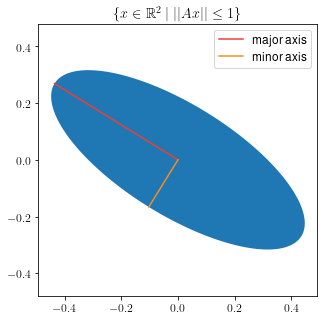

In [55]:
# Call the plot_ellipse function
A = np.array([[3,2],[1,4]])
plot_ellipse(A)

In [56]:
# This one is plotting the control problem
def plot_ellipse_control(A):
    orange = "#f28e24"
    red = "#eb4034"
    t = np.linspace(0, 2*np.pi, 200)
    z = np.vstack((np.cos(t), np.sin(t)))
    u, s, vt = np.linalg.svd(A)
    x = u @ np.diag(s) @ z
    plt.figure(figsize=(5,5))
    
    # Plot the ellipse
    plt.fill(x[0], x[1])
    
    print(u)
    # semi-major axis (u1 multiplied by larger singular value)
    plt.plot([0,u[0,0]*s[0]],[0,u[0,1]*s[0]],color=red,label='major axis')
    # semi-minor axis (u2 multiplied by smaller singular value)
    plt.plot([0,u[1,0]*s[1]],[0,u[1,1]*s[1]],color=orange,label='minor axis')
    plt.title("$\{Ax\in \mathbb{R}^2\mid||x||\leq 1\}$")
    plt.axis('equal')
    plt.legend()
    plt.show()

[[-0.64074744 -0.76775173]
 [-0.76775173  0.64074744]]


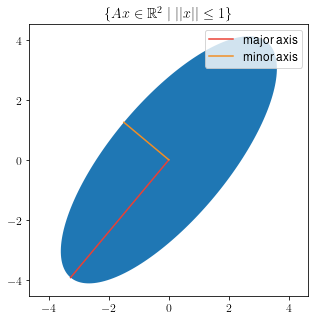

In [57]:
plot_ellipse_control(A)

### 3(a)
The $i^{th}$ diagonal element of $A^TA$ can be written as:
$$(A^TA)_{ii} = \sum^{n}_{j=1}A^T_{ij}A_{ji} = \sum^n_{j=1}|A_{ji}|^2$$ 
By the definition of trace we have:
$$trace(A^TA) = \sum^{n}_{i=1}\sum^n_{j=1}|A_{ji}|^2 = \sum_{i,j}|A_{ij}|^2$$
$$||A||_F = \sqrt{trace(A^TA)} = \left(\sum_{i,j}|A_{ij}|^2\right)^{1/2} \tag*{$\blacksquare$}$$


### 3(b)
$$||UA||_F = \sqrt{trace((UA)^T(UA))} = \sqrt{trace(A^T(U^TU)A)} = \sqrt{trace(A^TA)} = ||A||_F$$
\begin{align}||AV||_F &= \sqrt{trace((AV)^T(AV))} = \sqrt{trace((AV)(AV)^T)}  \\ 
&= \sqrt{trace(A(VV^T)A^T)} = \sqrt{trace(AA^T)} = \sqrt{trace(A^TA)} = ||A||_F \tag*{$\blacksquare$}
\end{align}

### 3(c)
The SVD of A is $A = U\Sigma V^T$. Because both $U$ and $V$ are orthogonal matrices, they don't change the Frobenius norm as prooved in 3(b). 
Thus we have $||A||_F = ||U\Sigma V^T||_F = ||\Sigma||_F = \sqrt{\sum_{i=1}^r\sigma_i^2}$
  
Suppose $\sigma_{max} = \sigma_1$ for matrix $A$ and all singular values are non-negative. We have:
$$||A||_F = \sqrt{\sum_{i=1}^r\sigma_i^2} \geq \sqrt{\sigma_1^2} = \sigma_1$$
$$||A||_F = \sqrt{\sum_{i=1}^r\sigma_i^2} \leq \sqrt{\sum_{i=1}^r\sigma_1^2} = \sqrt{r\sigma_1^2} = \sqrt{r}\sigma_1$$

By the definition of spectral norm, $||A|| = \sigma_1$, thus we have $||Ax|| \leq ||A||||x|| = \sigma_1||x|| \leq ||A||_F||x||$ for all x.
$$\tag*{$\blacksquare$}$$

### 4(a)
Because $(P+Q)-Q = P \succeq 0$, we have $P+Q \succeq Q$.
$$\tag*{$\blacksquare$}$$

### 4(b)
Given $P \succeq Q$, we have $Q - P \preceq 0$. Because $-P - (-Q) = -P + Q = Q - P \preceq 0$, we have $-P \preceq -Q$.   $$\tag*{$\blacksquare$}$$

### 4(c)
If $P$ is positive definite, then all of its eigenvalues are greater than 0: $\lambda_i >0$ for all $i$. The eigenvalues of $P^{-1}$ are $\frac{1}{\lambda_i}$, which should also be greater than 0 if all $\lambda_i$ are greater than 0. So we have $P^{-1}\succ0 \tag*{$\blacksquare$}$.  

### 4(d)  (Wrong proof)
If $P\succeq Q\succ 0$, that means all eigenvalues of $P$ are greater or equal to the eigenvalues of $Q$: $\lambda_P^i \geq \lambda_Q^i > 0$ for all $i$. The eigenvalues of $P^{-1}$ and $Q^{-1}$ are the reciprocal of $\lambda_P^i$ and $\lambda_Q^i$: $\frac{1}{\lambda_P^i}$ and $\frac{1}{\lambda_Q^i}$. Clearly, we have $0 < \frac{1}{\lambda_P^i} \leq \frac{1}{\lambda_Q^i}$ for all $i$. So we prooved $P^{-1} \preceq Q^{-1} \tag*{$\blacksquare$}$. 

### 4(d) (Correctified)
First we proove $Z \succeq I \Rightarrow Z^{-1} \preceq I$ if $Z$ is symmetric:
\begin{align*}
Z \succeq I &\Rightarrow x^T(Z-I)x &\geq 0 ,\forall x\\
&\Rightarrow (Z^{-1/2}x)^T(Z-I)(Z^{-1/2}x) &\geq 0 ,\forall x \\
&\Rightarrow x^T(Z^{-1/2}Z - Z^{-1/2})(Z^{-1/2}x) &\geq 0 ,\forall x\\
&\Rightarrow x^T(Z^{1/2} - Z^{-1/2})Z^{-1/2}x &\geq 0 ,\forall x\\
&\Rightarrow x^T(I - Z^{-1})x &\geq 0 ,\forall x\\
&\Rightarrow I \succeq Z^{-1} \tag*{$\blacksquare$}
\end{align*}

Now we can rewrite $P \succeq Q$ as:
\begin{align*}
P \succeq Q & \Rightarrow x^TPx &\geq& \;\; x^TQx, \forall x\\
&\Rightarrow (Q^{-1/2}x)^TP(Q^{-1/2}x) &\geq& \;\; (Q^{-1/2}x)^TQ(Q^{-1/2}x) \\
&\Rightarrow x^T(Q^{-1/2}PQ^{-1/2})x &\geq&\;\; x^TIx \\
&\Rightarrow Q^{-1/2}PQ^{-1/2} &\succeq&\;\; I \\
&\Rightarrow (Q^{-1/2}PQ^{-1/2})^{-1} &\preceq&\;\; I \\
&\Rightarrow x^T(Q^{-1/2}PQ^{-1/2})^{-1}x &\leq&\;\; x^Tx \tag{1}\\
\end{align*}
Now we define $\tilde{x} = Q^{1/2}x$, so $x = Q^{-1/2}\tilde{x}$ and substitute into $(1)$:
\begin{align*}
&x^T(Q^{-1/2}PQ^{-1/2})^{-1}x &\leq&\;\; x^Tx\\
\Rightarrow & (Q^{-1/2}\tilde{x})^T(Q^{-1/2}PQ^{-1/2})^{-1}(Q^{-1/2}\tilde{x}) &\leq&\;\; (Q^{-1/2}\tilde{x})^T(Q^{-1/2}\tilde{x}) \\
\Rightarrow & \tilde{x}^TQ^{-1/2}(Q^{1/2}P^{-1}Q^{1/2})Q^{-1/2}\tilde{x} &\leq&\;\; \tilde{x}^TQ^{-1/2}Q^{-1/2}\tilde{x} \\
\Rightarrow & \tilde{x}^TP^{-1}\tilde{x} &\leq&\;\; \tilde{x}Q^{-1}\tilde{x}\\
\Rightarrow & \tilde{x}^(P^{-1}-Q^{-1})\tilde{x} &\leq&\;\; 0, \forall \tilde{x}\\
\Rightarrow & P^{-1} \preceq\;\; Q^{-1} \tag*{$\blacksquare$}
\end{align*}

### 4(e)
This is not true. For example:
$$P = \begin{bmatrix} 3 & 0 \\ 0 & 1 \end{bmatrix}\;\;\;  Q = \begin{bmatrix} -5 & 0 \\ 0 & -2 \end{bmatrix} $$
In this case, $P \succeq Q$, however $P^2 \preceq Q^2$.   $$\tag*{$\blacksquare$}$$

### 5
Expand the summation expression we have:  

\begin{align*}
& (x_n-x_{n-1})^2 + (x_{n-1}-x_{n-2})^2 + \ldots + (x_2 - x_1)^2 \\
&= x_n^2 - 2x_nx_{n-1} + 2x_{n-1}^2 - 2x_{n-1}x_{n-2} + \ldots + 2x_2^2 - 2x_2x_1 + x_1^2
\end{align*}

So we can write P as:
$$ P = \begin{bmatrix} 1 & -1 & 0 & \ldots & 0 \\ 
                        -1 & 2 & -1 & \ldots & 0 \\ 
                        \vdots & \vdots & \vdots & \vdots & \vdots \\
                        0 & 0 & 0 & \dots & 1
\end{bmatrix}$$
while $x = [x_1, x_2, \dots, x_n]^T$

Since we have already written the quadratic form $x^TPx$ of $\sum^{n-1}_{i=1}(x_{i+1}-x_i)^2$, which is greater or equal to 0 for any $x$, so we know P is semi-positive definite ($P \succeq 0$). However, we can find non-zero $x$ that makes $\sum^{n-1}_{i=1}(x_{i+1}-x_i)^2 = x^TPx = 0$, for example, when all $x_i$ are the same for any $i$ such that $x_{i+1}-x_i = 0$ is always true. So $P$ is not positive definite.

The original image size is  (900, 900)


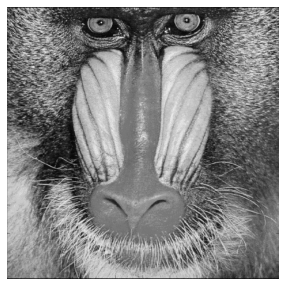

After SVD compression we have:


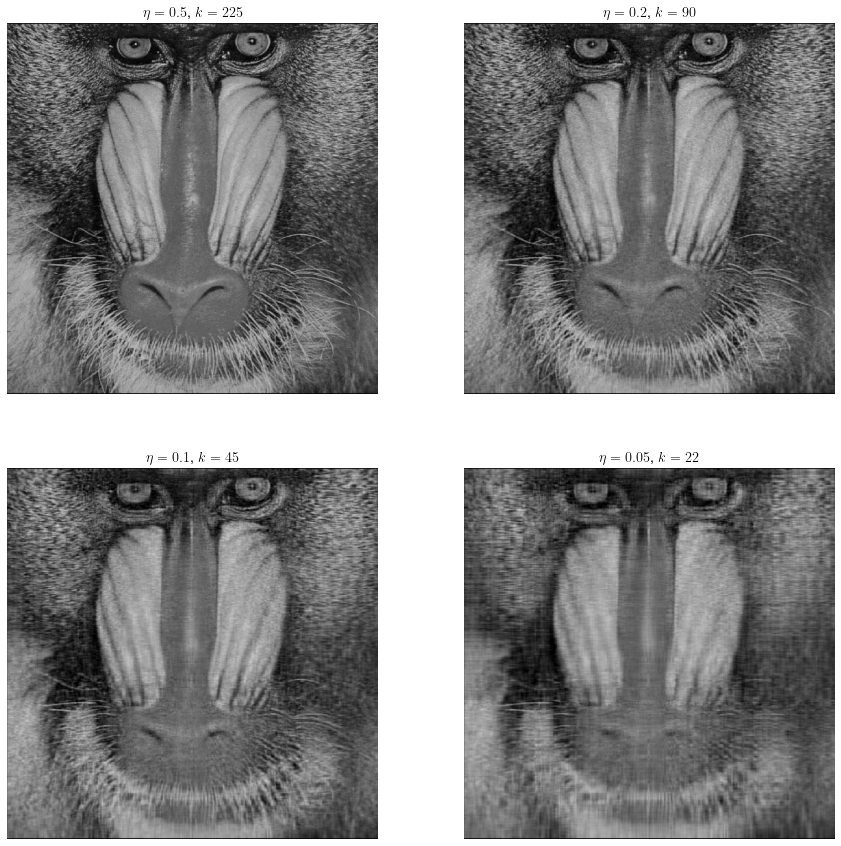

In [58]:
img = Image.open('assets/mandrill.png')
img = img.resize((900,900))
gray_img = img.convert("L")
# ax1 = fig.add_subplot(1,2,1)
# ax1.imshow(img)
# ax1.axis('off')

## convert between numpy array and PIL image
np_img = np.array(gray_img)
PIL_img = Image.fromarray(np_img)

## Print the original shape of image (900 x 900)
print("The original image size is ", np_img.shape)
m,n = np_img.shape
fig = plt.figure(figsize=(5,5))
plt.imshow(np_img,cmap='gray')
plt.axis('off')
plt.show()

## Set yita to 0.5, 0.2 and 0.1 in a loop
etas = [0.5, 0.2, 0.1, 0.05]

fig, axes = plt.subplots(2,2,figsize=(15,15))

print("After SVD compression we have:")
for i in range(len(etas)):
    k = int(etas[i] * m * n / (m + n))
    
    u, s, vh = np.linalg.svd(np_img)
    com_img = u[:,0:k] @ np.diag(s[0:k]) @ vh[0:k,:]
    com_pil_img = Image.fromarray(com_img)
    ax = axes[i//2, i%2]
    ax.imshow(com_pil_img,cmap='gray')
    ax.axis('off')
    ax.set_title(f"$\eta={etas[i]}$, $k={k}$")
plt.show()



I think $\eta = 0.2$ is a good threshold to compress the image without losing too much detail.